# 3.2 使用Python實作硬投票(分類)

## 自製完整硬投票機制

In [1]:
# --- 第 1 部分 ---
# 載入函式庫
from sklearn import datasets, linear_model, svm, neighbors
from sklearn.metrics import accuracy_score
from numpy import argmax
# 載入資料集
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target


In [2]:
# --- 第 2 部分 ---
# 初始化基學習器
learner_1 = neighbors.KNeighborsClassifier(n_neighbors = 5)
learner_2 = linear_model.Perceptron(tol = 1e-2, random_state = 2)
learner_3 = svm.SVC(gamma = 0.001)


In [3]:
# --- 第 3 部分 ---
# 把資料分為訓練資料集和驗證資料集
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

# 訓練基學習器
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)


SVC(gamma=0.001)

In [4]:
# --- 第 4 部分 ---
# 每個基學習器預測驗證資料的類別
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)


In [5]:
predictions_1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [6]:
predictions_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [7]:
predictions_3

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# --- 第 5 部分 ---
# 使用硬投票結合預測
hard_predictions = []
# 對每一筆驗證資料
for i in range(test_samples):
    # 計算每個類別的得票數
    counts = [0 for _ in range(2)]
    counts[predictions_1[i]] = counts[predictions_1[i]]+1
    counts[predictions_2[i]] = counts[predictions_2[i]]+1
    counts[predictions_3[i]] = counts[predictions_3[i]]+1
    # 找到得票最多的類別
    final = argmax(counts)
    # 將此類別加入最終預測中
    hard_predictions.append(final)


In [10]:
# --- 第 6 部分 ---
# 基學習器的準確率
print('L1:', accuracy_score(y_test, predictions_1))
print('L2:', accuracy_score(y_test, predictions_2))
print('L3:', accuracy_score(y_test, predictions_3))
# 硬投票的準確率
print('-'*30)
print('Hard Voting:', accuracy_score(y_test, hard_predictions))


L1: 0.94
L2: 0.92
L3: 0.88
------------------------------
Hard Voting: 0.95


In [12]:
# --- 第 1 部分 ---
# 載入函式庫
import matplotlib as mpl
import matplotlib.pyplot as plt
# 設定視覺化風格
mpl.style.use('seaborn-paper')


In [13]:
# --- 第 2 部分 ---
# 計算誤差
errors_1 = y_test-predictions_1
errors_2 = y_test-predictions_2
errors_3 = y_test-predictions_3


In [14]:
errors_1

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [16]:
errors_2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0])

In [17]:
errors_3

array([ 0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0, -1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1])

## 視覺化硬投票的結果

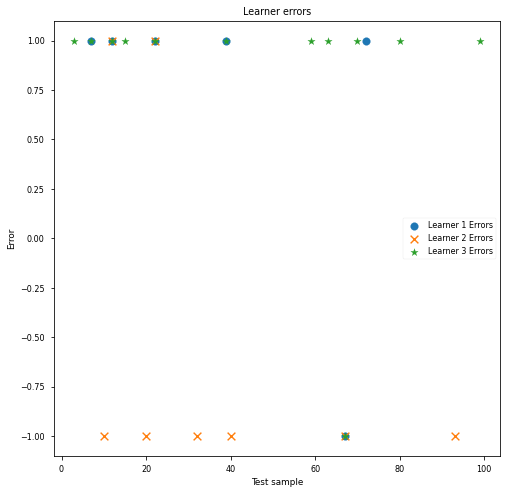

In [18]:
# --- 第 3 部分 ---
# 略去正確的預測並繪製每個基學習器的誤差
plt.figure(figsize = (8, 8))
x=[]
y=[]
for i in range(len(errors_1)):
    if not errors_1[i] == 0:
        x.append(i)
        y.append(errors_1[i])
plt.scatter(x, y, marker='o', s=60, label='Learner 1 Errors')

x=[]
y=[]
for i in range(len(errors_2)):
    if not errors_2[i] == 0:
        x.append(i)
        y.append(errors_2[i])
plt.scatter(x, y, marker='x', s=60, label='Learner 2 Errors')

x=[]
y=[]
for i in range(len(errors_3)):
    if not errors_3[i] == 0:
        x.append(i)
        y.append(errors_3[i])
plt.scatter(x, y, marker='*', s=60, label='Learner 3 Errors')
plt.title('Learner errors')
plt.xlabel('Test sample')
plt.ylabel('Error')
plt.legend()
plt.show()



## 使用scikit-learn函式庫實作硬投票機制(VotingClassifier)

In [20]:
# --- 第 1 部分 ---
# 載入函式庫
from sklearn import datasets, linear_model, svm, neighbors
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
# 載入資料集
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

# 把資料分為訓練集與測試集
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]


In [21]:
# --- 第 2 部分 ---
# 初始化基學習器
learner_1 = neighbors.KNeighborsClassifier(n_neighbors = 5)
learner_2 = linear_model.Perceptron(tol = 1e-2, random_state = 2)
learner_3 = svm.SVC(gamma = 0.001)


In [22]:
# --- 第 3 部分 ---
# 初始化硬投票機制
voting = VotingClassifier([('KNN', learner_1),
                           ('Prc', learner_2),
                           ('SVM', learner_3)])


In [23]:
# --- 第 4 部分 ---
# 訓練集成後模型
voting.fit(x_train, y_train)


VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('Prc', Perceptron(random_state=2, tol=0.01)),
                             ('SVM', SVC(gamma=0.001))])

In [24]:
# --- 第 5 部分 ---
# 使用集成後模型做預測
hard_predictions = voting.predict(x_test)


In [25]:
# --- 第 6 部分 ---
# 硬投票的準確率
print('-'*30)
print('Hard Voting:', accuracy_score(y_test, hard_predictions))


------------------------------
Hard Voting: 0.95
